In [94]:
import pandas as pd
import random
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import math
import statistics as stat
from scipy.stats import norm
import pprint
import numpy as np


In order to execute this notebook we should upload the following files:
- all_players_wages.xlsx
- all_players:miscellaneous_stats.xlsx
- Miscellaneous_stat_team.xlsx
- Miscellaneous_opponant_stat_team.xlsx


# ***1-Team Analysis and ratings***

***Axis4 : Miscellaneous Stats***

***sub-axis4.1 : Yellow Card***

In [95]:
df = pd.read_excel('/content/Miscellaneous_stat_team.xlsx')
df1=pd.read_excel('/content/Miscellaneous_opponant_stat_team.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [96]:
dico = df.set_index('Squad')['CrdY'].to_dict()
dic = df1.set_index('Squad')['CrdY'].to_dict()
dico["Nottham Forest"] = dico["Nott'ham Forest"]
del dico["Nott'ham Forest"]
dic["Nottham Forest"] = dic["Nott'ham Forest "]
del dic["Nott'ham Forest "]

In [97]:
d = dico.copy()
d1 = dico.copy()
for (key,value) in d.items():
  if value > np.percentile(list(d.values()),90):
    d1[key]=2
  if value <= np.percentile(list(d.values()),90) and value > np.percentile(list(d.values()),80):
    d1[key]=4
  if value <= np.percentile(list(d.values()),80) and value > np.percentile(list(d.values()),70):
    d1[key]=6
  if value <= np.percentile(list(d.values()),70) and value > np.percentile(list(d.values()),60):
    d1[key]=8
  if value <= np.percentile(list(d.values()),60) and value > np.percentile(list(d.values()),50):
    d1[key]=10
  if value <= np.percentile(list(d.values()),50) and value > np.percentile(list(d.values()),40):
    d1[key]=12
  if value <= np.percentile(list(d.values()),40) and value > np.percentile(list(d.values()),30):
    d1[key]=14
  if value <= np.percentile(list(d.values()),30) and value > np.percentile(list(d.values()),20):
    d1[key]=16
  if value <= np.percentile(list(d.values()),20) and value > np.percentile(list(d.values()),10):
    d1[key]=18
  if value <= np.percentile(list(d.values()),10):
    d1[key]=20

pprint.pprint(d1)
print(f"Mean :{stat.mean(list(d1.values()))}\n")

dd = dic.copy()
dd1 = dic.copy()
for (key,value) in dd.items():
  if value > np.percentile(list(dd.values()),90):
    dd1[key]=20
  if value <= np.percentile(list(dd.values()),90) and value > np.percentile(list(dd.values()),80):
    dd1[key]=18
  if value <= np.percentile(list(dd.values()),80) and value > np.percentile(list(dd.values()),70):
    dd1[key]=16
  if value <= np.percentile(list(dd.values()),70) and value > np.percentile(list(dd.values()),60):
    dd1[key]=14
  if value <= np.percentile(list(dd.values()),60) and value > np.percentile(list(dd.values()),50):
    dd1[key]=12
  if value <= np.percentile(list(dd.values()),50) and value > np.percentile(list(dd.values()),40):
    dd1[key]=10
  if value <= np.percentile(list(dd.values()),40) and value > np.percentile(list(dd.values()),30):
    dd1[key]=8
  if value <= np.percentile(list(dd.values()),30) and value > np.percentile(list(dd.values()),20):
    dd1[key]=6
  if value <= np.percentile(list(dd.values()),20) and value > np.percentile(list(dd.values()),10):
    dd1[key]=4
  if value <= np.percentile(list(dd.values()),10):
    dd1[key]=2

pprint.pprint(dd1)
print(f"Mean :{stat.mean(list(dd1.values()))}\n")


{'Arsenal': 18,
 'Aston Villa': 8,
 'Bournemouth': 12,
 'Brentford': 18,
 'Brighton': 16,
 'Chelsea': 6,
 'Crystal Palace': 4,
 'Everton': 6,
 'Fulham': 8,
 'Leeds United': 2,
 'Leicester City': 14,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 10,
 'Newcastle Utd': 14,
 'Nottham Forest': 4,
 'Southampton': 12,
 'Tottenham': 10,
 'West Ham': 20,
 'Wolves': 2}
Mean :11.1

{'Arsenal': 18,
 'Aston Villa': 20,
 'Bournemouth': 2,
 'Brentford': 6,
 'Brighton': 20,
 'Chelsea': 12,
 'Crystal Palace': 18,
 'Everton': 14,
 'Fulham': 4,
 'Leeds United': 10,
 'Leicester City': 8,
 'Liverpool': 6,
 'Manchester City': 16,
 'Manchester Utd': 2,
 'Newcastle Utd': 16,
 'Nottham Forest': 10,
 'Southampton': 8,
 'Tottenham': 14,
 'West Ham': 4,
 'Wolves': 12}
Mean :11



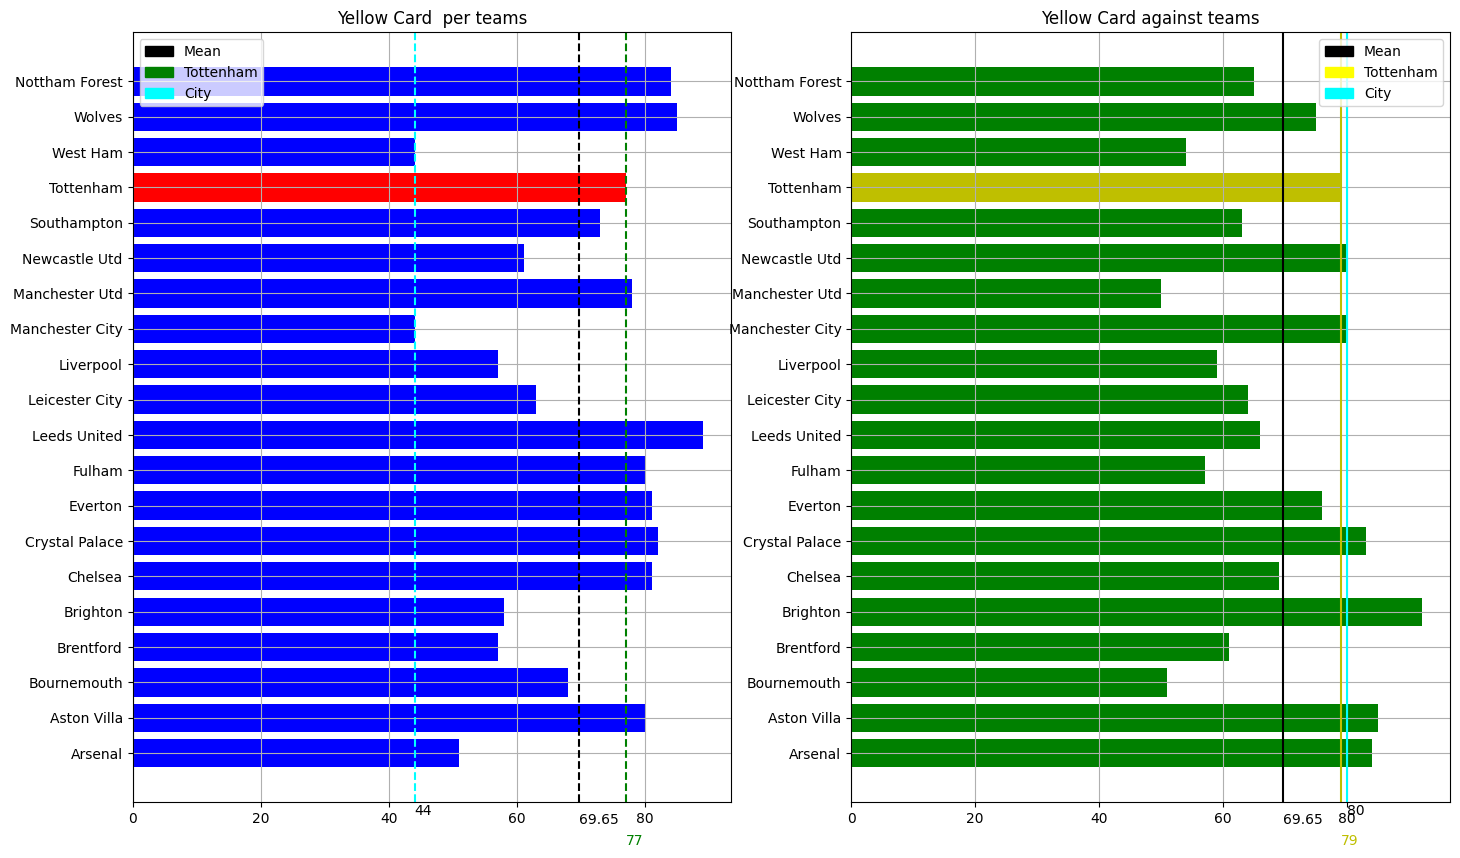

In [98]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico.keys()),list(dico.values()),color=colors)
ax[1].barh(list(dic.keys()),list(dic.values()),color=color)
ax[0].axvline(stat.mean(list(dico.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico.values())),-2, f'{stat.mean(list(dico.values()))}',color='black')
ax[0].axvline(dico["Tottenham"],color='green',linestyle='--')
ax[0].text(dico["Tottenham"],-2.6, f'{dico["Tottenham"]}',color='green')
ax[0].axvline(dico["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico["Manchester City"],-1.75, f'{dico["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic.values())),-2, f'{stat.mean(list(dic.values()))}',color='black')
ax[1].axvline(dic["Tottenham"],color='y',linestyle='-')
ax[1].text(dic["Tottenham"],-2.6, f'{dic["Tottenham"]}',color='y')
ax[1].axvline(dic["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic["Manchester City"],-1.75, f'{dic["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Yellow Card  per teams')
ax[1].set_title('Yellow Card against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis4.2 : Red Card***

In [99]:
dico1 = df.set_index('Squad')['CrdR'].to_dict()
dic1 = df1.set_index('Squad')['CrdR'].to_dict()
dico1["Nottham Forest"] = dico1["Nott'ham Forest"]
del dico1["Nott'ham Forest"]
dic1["Nottham Forest"] = dic1["Nott'ham Forest "]
del dic1["Nott'ham Forest "]

In [100]:
d2 = dico1.copy()
d3 = dico1.copy()
for (key,value) in d2.items():
  if value > np.percentile(list(d2.values()),90):
    d3[key]=2
  if value <= np.percentile(list(d2.values()),90) and value > np.percentile(list(d2.values()),80):
    d3[key]=4
  if value <= np.percentile(list(d2.values()),80) and value > np.percentile(list(d2.values()),70):
    d3[key]=6
  if value <= np.percentile(list(d2.values()),70) and value > np.percentile(list(d2.values()),60):
    d3[key]=8
  if value <= np.percentile(list(d2.values()),60) and value > np.percentile(list(d2.values()),50):
    d3[key]=10
  if value <= np.percentile(list(d2.values()),50) and value > np.percentile(list(d2.values()),40):
    d3[key]=12
  if value <= np.percentile(list(d2.values()),40) and value > np.percentile(list(d2.values()),30):
    d3[key]=14
  if value <= np.percentile(list(d2.values()),30) and value > np.percentile(list(d2.values()),20):
    d3[key]=16
  if value <= np.percentile(list(d2.values()),20) and value > np.percentile(list(d2.values()),10):
    d3[key]=18
  if value <= np.percentile(list(d2.values()),10):
    d3[key]=20

pprint.pprint(d3)
print(f"Mean :{stat.mean(list(d3.values()))}\n")

dd2 = dic1.copy()
dd3 = dic1.copy()
for (key,value) in dd2.items():
  if value > np.percentile(list(dd2.values()),90):
    dd3[key]=20
  if value <= np.percentile(list(dd2.values()),90) and value > np.percentile(list(dd2.values()),80):
    dd3[key]=18
  if value <= np.percentile(list(dd2.values()),80) and value > np.percentile(list(dd2.values()),70):
    dd3[key]=16
  if value <= np.percentile(list(dd2.values()),70) and value > np.percentile(list(dd2.values()),60):
    dd3[key]=14
  if value <= np.percentile(list(dd2.values()),60) and value > np.percentile(list(dd2.values()),50):
    dd3[key]=12
  if value <= np.percentile(list(dd2.values()),50) and value > np.percentile(list(dd2.values()),40):
    dd3[key]=10
  if value <= np.percentile(list(dd2.values()),40) and value > np.percentile(list(dd2.values()),30):
    dd3[key]=8
  if value <= np.percentile(list(dd2.values()),30) and value > np.percentile(list(dd2.values()),20):
    dd3[key]=6
  if value <= np.percentile(list(dd2.values()),20) and value > np.percentile(list(dd2.values()),10):
    dd3[key]=4
  if value <= np.percentile(list(dd2.values()),10):
    dd3[key]=2

pprint.pprint(dd3)
print(f"Mean :{stat.mean(list(dd3.values()))}\n")


{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 20,
 'Brentford': 14,
 'Brighton': 20,
 'Chelsea': 6,
 'Crystal Palace': 6,
 'Everton': 8,
 'Fulham': 14,
 'Leeds United': 6,
 'Leicester City': 8,
 'Liverpool': 14,
 'Manchester City': 14,
 'Manchester Utd': 8,
 'Newcastle Utd': 14,
 'Nottham Forest': 20,
 'Southampton': 20,
 'Tottenham': 6,
 'West Ham': 20,
 'Wolves': 2}
Mean :12.7

{'Arsenal': 6,
 'Aston Villa': 18,
 'Bournemouth': 2,
 'Brentford': 6,
 'Brighton': 6,
 'Chelsea': 6,
 'Crystal Palace': 18,
 'Everton': 6,
 'Fulham': 20,
 'Leeds United': 18,
 'Leicester City': 12,
 'Liverpool': 6,
 'Manchester City': 12,
 'Manchester Utd': 2,
 'Newcastle Utd': 12,
 'Nottham Forest': 2,
 'Southampton': 12,
 'Tottenham': 12,
 'West Ham': 2,
 'Wolves': 2}
Mean :9



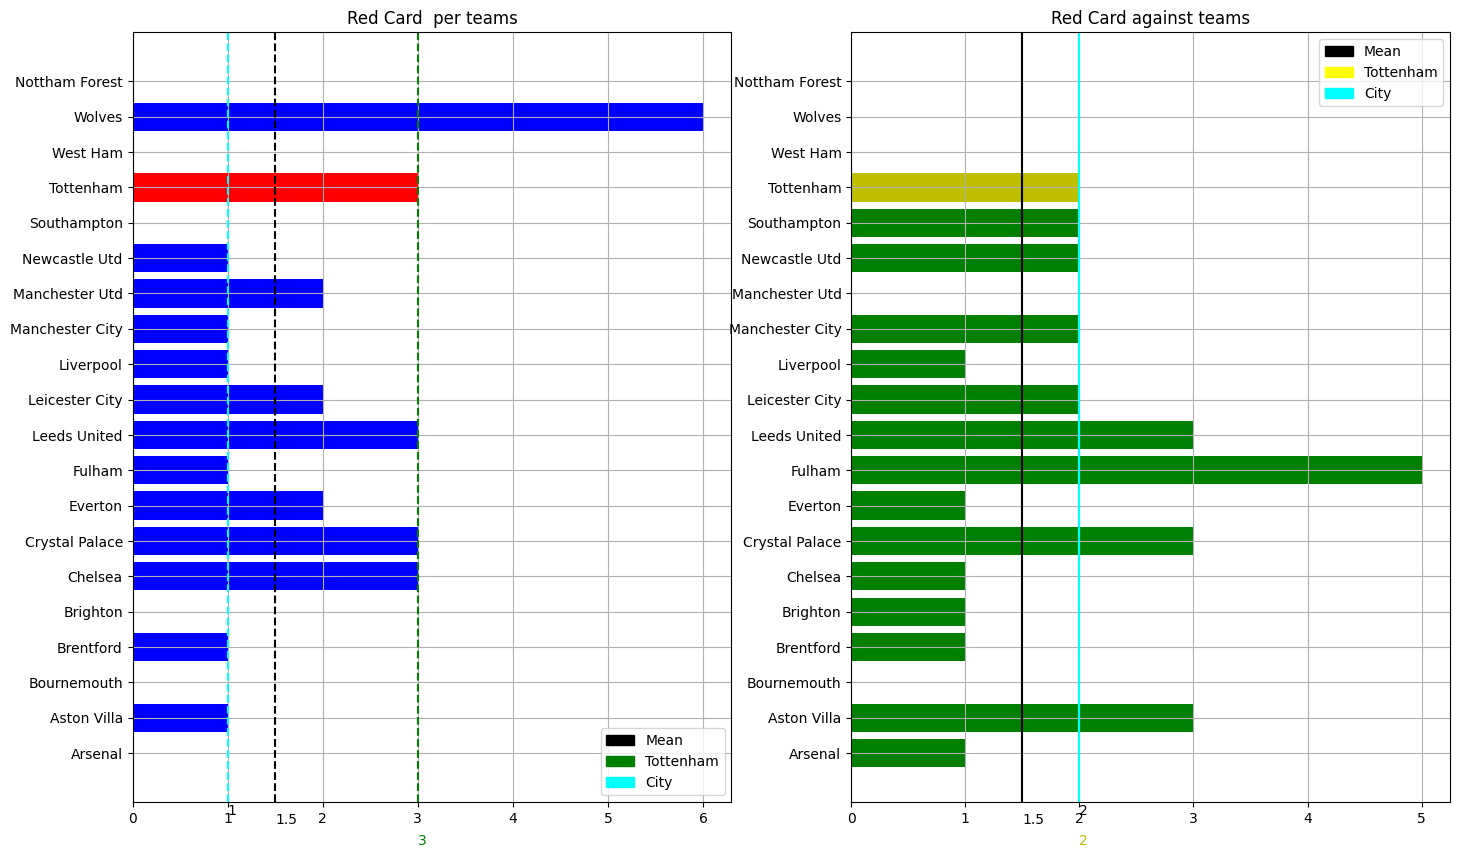

In [101]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico1.keys()),list(dico1.values()),color=colors)
ax[1].barh(list(dic1.keys()),list(dic1.values()),color=color)
ax[0].axvline(stat.mean(list(dico1.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico1.values())),-2, f'{stat.mean(list(dico1.values()))}',color='black')
ax[0].axvline(dico1["Tottenham"],color='green',linestyle='--')
ax[0].text(dico1["Tottenham"],-2.6, f'{dico1["Tottenham"]}',color='green')
ax[0].axvline(dico1["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico1["Manchester City"],-1.75, f'{dico1["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic1.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic1.values())),-2, f'{stat.mean(list(dic1.values()))}',color='black')
ax[1].axvline(dic1["Tottenham"],color='y',linestyle='-')
ax[1].text(dic1["Tottenham"],-2.6, f'{dic1["Tottenham"]}',color='y')
ax[1].axvline(dic1["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic1["Manchester City"],-1.75, f'{dic1["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Red Card  per teams')
ax[1].set_title('Red Card against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis4.3 : Fouls***

In [102]:
dico2 = df.set_index('Squad')['Fls'].to_dict()
dic2 = df1.set_index('Squad')['Fls'].to_dict()
dico2["Nottham Forest"] = dico2["Nott'ham Forest"]
del dico2["Nott'ham Forest"]
dic2["Nottham Forest"] = dic2["Nott'ham Forest "]
del dic2["Nott'ham Forest "]

In [103]:
d4 = dico2.copy()
d5 = dico2.copy()
for (key,value) in d4.items():
  if value > np.percentile(list(d4.values()),90):
    d5[key]=2
  if value < np.percentile(list(d4.values()),90) and value > np.percentile(list(d4.values()),80):
    d5[key]=4
  if value < np.percentile(list(d4.values()),80) and value > np.percentile(list(d4.values()),70):
    d5[key]=6
  if value < np.percentile(list(d4.values()),70) and value > np.percentile(list(d4.values()),60):
    d5[key]=8
  if value < np.percentile(list(d4.values()),60) and value > np.percentile(list(d4.values()),50):
    d5[key]=10
  if value < np.percentile(list(d4.values()),50) and value > np.percentile(list(d4.values()),40):
    d5[key]=12
  if value < np.percentile(list(d4.values()),40) and value > np.percentile(list(d4.values()),30):
    d5[key]=14
  if value < np.percentile(list(d4.values()),30) and value > np.percentile(list(d4.values()),20):
    d5[key]=16
  if value < np.percentile(list(d4.values()),20) and value > np.percentile(list(d4.values()),10):
    d5[key]=18
  if value < np.percentile(list(d4.values()),10):
    d5[key]=20

pprint.pprint(d5)
print(f"Mean :{stat.mean(list(d5.values()))}\n")

dd4 = dic2.copy()
dd5 = dic2.copy()
for (key,value) in dd4.items():
  if value > np.percentile(list(dd4.values()),90):
    dd5[key]=20
  if value < np.percentile(list(dd4.values()),90) and value > np.percentile(list(dd4.values()),80):
    dd5[key]=18
  if value < np.percentile(list(dd4.values()),80) and value > np.percentile(list(dd4.values()),70):
    dd5[key]=16
  if value < np.percentile(list(dd4.values()),70) and value > np.percentile(list(dd4.values()),60):
    dd5[key]=14
  if value < np.percentile(list(dd4.values()),60) and value > np.percentile(list(dd4.values()),50):
    dd5[key]=12
  if value < np.percentile(list(dd4.values()),50) and value > np.percentile(list(dd4.values()),40):
    dd5[key]=10
  if value < np.percentile(list(dd4.values()),40) and value > np.percentile(list(dd4.values()),30):
    dd5[key]=8
  if value < np.percentile(list(dd4.values()),30) and value > np.percentile(list(dd4.values()),20):
    dd5[key]=6
  if value < np.percentile(list(dd4.values()),20) and value > np.percentile(list(dd4.values()),10):
    dd5[key]=4
  if value < np.percentile(list(dd4.values()),10):
    dd5[key]=2

pprint.pprint(dd5)
print(f"Mean :{stat.mean(list(dd5.values()))}\n")

{'Arsenal': 18,
 'Aston Villa': 10,
 'Bournemouth': 16,
 'Brentford': 20,
 'Brighton': 6,
 'Chelsea': 14,
 'Crystal Palace': 4,
 'Everton': 16,
 'Fulham': 10,
 'Leeds United': 2,
 'Leicester City': 12,
 'Liverpool': 14,
 'Manchester City': 20,
 'Manchester Utd': 8,
 'Newcastle Utd': 12,
 'Nottham Forest': 4,
 'Southampton': 6,
 'Tottenham': 8,
 'West Ham': 18,
 'Wolves': 2}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 20,
 'Bournemouth': 4,
 'Brentford': 12,
 'Brighton': 16,
 'Chelsea': 18,
 'Crystal Palace': 20,
 'Everton': 8,
 'Fulham': 14,
 'Leeds United': 16,
 'Leicester City': 10,
 'Liverpool': 4,
 'Manchester City': 8,
 'Manchester Utd': 2,
 'Newcastle Utd': 14,
 'Nottham Forest': 12,
 'Southampton': 6,
 'Tottenham': 6,
 'West Ham': 2,
 'Wolves': 10}
Mean :11



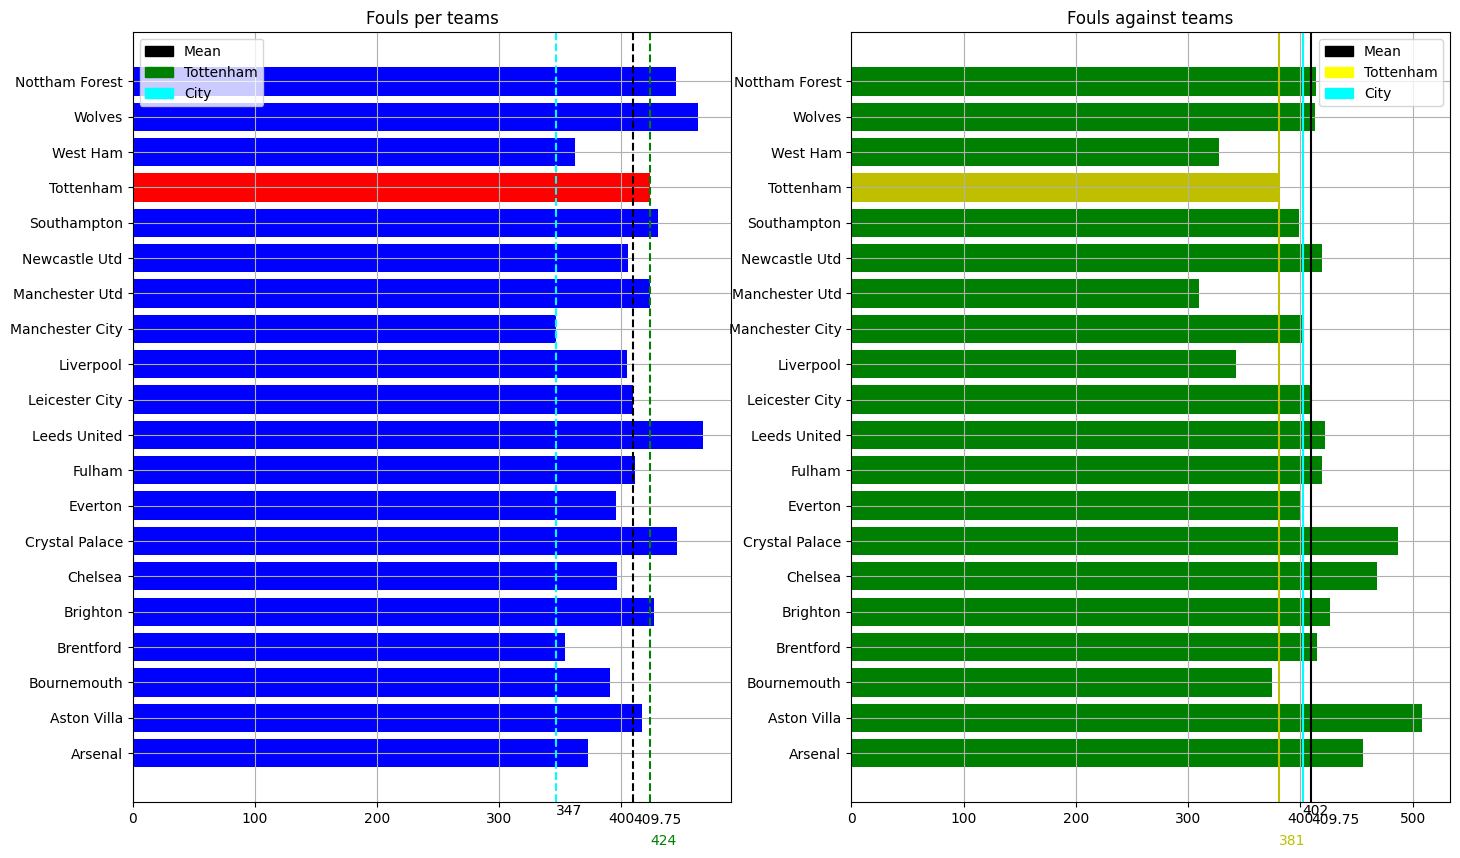

In [104]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico2.keys()),list(dico2.values()),color=colors)
ax[1].barh(list(dic2.keys()),list(dic2.values()),color=color)
ax[0].axvline(stat.mean(list(dico2.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico2.values())),-2, f'{stat.mean(list(dico2.values()))}',color='black')
ax[0].axvline(dico2["Tottenham"],color='green',linestyle='--')
ax[0].text(dico2["Tottenham"],-2.6, f'{dico2["Tottenham"]}',color='green')
ax[0].axvline(dico2["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico2["Manchester City"],-1.75, f'{dico2["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic2.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic2.values())),-2, f'{stat.mean(list(dic2.values()))}',color='black')
ax[1].axvline(dic2["Tottenham"],color='y',linestyle='-')
ax[1].text(dic2["Tottenham"],-2.6, f'{dic2["Tottenham"]}',color='y')
ax[1].axvline(dic2["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic2["Manchester City"],-1.75, f'{dic2["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Fouls per teams')
ax[1].set_title('Fouls against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis4.4 : Balls Recovered***

In [105]:
dico3 = df.set_index('Squad')['Recov'].to_dict()
dic3 = df1.set_index('Squad')['Recov'].to_dict()
dico3["Nottham Forest"] = dico3["Nott'ham Forest"]
del dico3["Nott'ham Forest"]
dic3["Nottham Forest"] = dic3["Nott'ham Forest "]
del dic3["Nott'ham Forest "]

In [106]:
d6 = dico3.copy()
d7 = dico3.copy()
for (key,value) in d6.items():
  if value > np.percentile(list(d6.values()),90):
    d7[key]=20
  if value <= np.percentile(list(d6.values()),90) and value > np.percentile(list(d6.values()),80):
    d7[key]=18
  if value <= np.percentile(list(d6.values()),80) and value > np.percentile(list(d6.values()),70):
    d7[key]=16
  if value <= np.percentile(list(d6.values()),70) and value > np.percentile(list(d6.values()),60):
    d7[key]=14
  if value <= np.percentile(list(d6.values()),60) and value > np.percentile(list(d6.values()),50):
    d7[key]=12
  if value <= np.percentile(list(d6.values()),50) and value > np.percentile(list(d6.values()),40):
    d7[key]=10
  if value <= np.percentile(list(d6.values()),40) and value > np.percentile(list(d6.values()),30):
    d7[key]=8
  if value <= np.percentile(list(d6.values()),30) and value > np.percentile(list(d6.values()),20):
    d7[key]=6
  if value <= np.percentile(list(d6.values()),20) and value > np.percentile(list(d6.values()),10):
    d7[key]=4
  if value <= np.percentile(list(d6.values()),10):
    d7[key]=2

pprint.pprint(d7)
print(f"Mean :{stat.mean(list(d7.values()))}\n")

dd6 = dic3.copy()
dd7 = dic3.copy()
for (key,value) in dd6.items():
  if value > np.percentile(list(dd6.values()),90):
    dd7[key]=2
  if value <= np.percentile(list(dd6.values()),90) and value > np.percentile(list(dd6.values()),80):
    dd7[key]=4
  if value <= np.percentile(list(dd6.values()),80) and value > np.percentile(list(dd6.values()),70):
    dd7[key]=6
  if value <= np.percentile(list(dd6.values()),70) and value > np.percentile(list(dd6.values()),60):
    dd7[key]=8
  if value <= np.percentile(list(dd6.values()),60) and value > np.percentile(list(dd6.values()),50):
    dd7[key]=10
  if value <= np.percentile(list(dd6.values()),50) and value > np.percentile(list(dd6.values()),40):
    dd7[key]=12
  if value <= np.percentile(list(dd6.values()),40) and value > np.percentile(list(dd6.values()),30):
    dd7[key]=14
  if value <= np.percentile(list(dd6.values()),30) and value > np.percentile(list(dd6.values()),20):
    dd7[key]=16
  if value <= np.percentile(list(dd6.values()),20) and value > np.percentile(list(dd6.values()),10):
    dd7[key]=18
  if value <= np.percentile(list(dd6.values()),10):
    dd7[key]=20

pprint.pprint(dd7)
print(f"Mean :{stat.mean(list(dd7.values()))}\n")

{'Arsenal': 8,
 'Aston Villa': 2,
 'Bournemouth': 4,
 'Brentford': 6,
 'Brighton': 10,
 'Chelsea': 12,
 'Crystal Palace': 16,
 'Everton': 14,
 'Fulham': 6,
 'Leeds United': 20,
 'Leicester City': 10,
 'Liverpool': 20,
 'Manchester City': 2,
 'Manchester Utd': 18,
 'Newcastle Utd': 16,
 'Nottham Forest': 4,
 'Southampton': 18,
 'Tottenham': 8,
 'West Ham': 12,
 'Wolves': 14}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 16,
 'Bournemouth': 4,
 'Brentford': 14,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 4,
 'Everton': 8,
 'Fulham': 10,
 'Leeds United': 2,
 'Leicester City': 6,
 'Liverpool': 8,
 'Manchester City': 20,
 'Manchester Utd': 6,
 'Newcastle Utd': 18,
 'Nottham Forest': 12,
 'Southampton': 2,
 'Tottenham': 12,
 'West Ham': 10,
 'Wolves': 14}
Mean :11.1



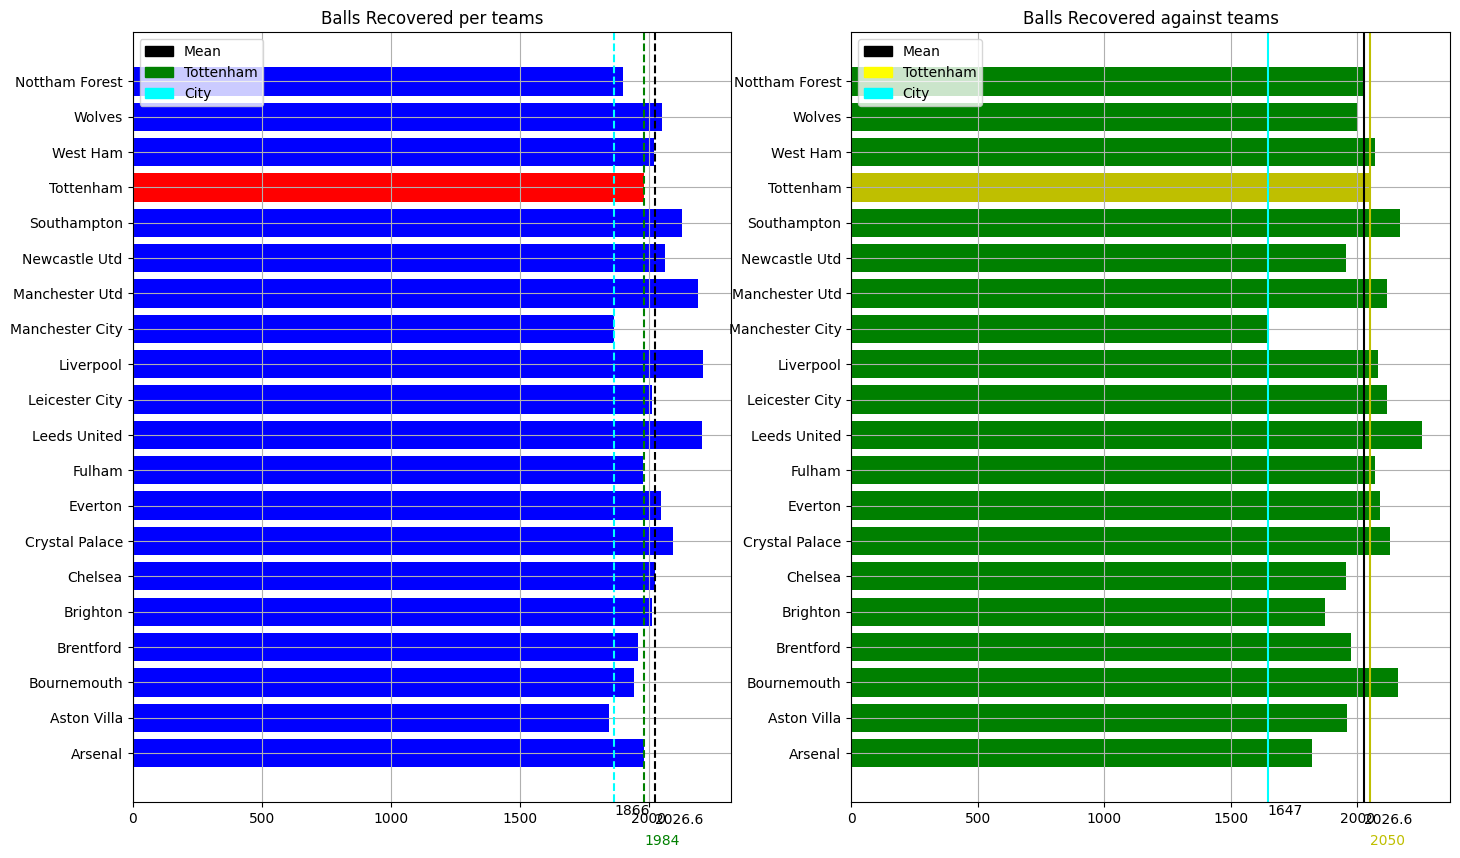

In [107]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico3.keys()),list(dico3.values()),color=colors)
ax[1].barh(list(dic3.keys()),list(dic3.values()),color=color)
ax[0].axvline(stat.mean(list(dico3.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico3.values())),-2, f'{stat.mean(list(dico3.values()))}',color='black')
ax[0].axvline(dico3["Tottenham"],color='green',linestyle='--')
ax[0].text(dico3["Tottenham"],-2.6, f'{dico3["Tottenham"]}',color='green')
ax[0].axvline(dico3["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico3["Manchester City"],-1.75, f'{dico3["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic3.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic3.values())),-2, f'{stat.mean(list(dic3.values()))}',color='black')
ax[1].axvline(dic3["Tottenham"],color='y',linestyle='-')
ax[1].text(dic3["Tottenham"],-2.6, f'{dic3["Tottenham"]}',color='y')
ax[1].axvline(dic3["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic3["Manchester City"],-1.75, f'{dic3["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Balls Recovered per teams')
ax[1].set_title('Balls Recovered against teams')
ax[0].grid(True)
ax[1].grid(True)

***sub-axis4.5 : %Aerial Duel Won***

In [108]:
dico4 = df.set_index('Squad')['Won%'].to_dict()
dic4 = df1.set_index('Squad')['Won%'].to_dict()
dico4["Nottham Forest"] = dico4["Nott'ham Forest"]
del dico4["Nott'ham Forest"]
dic4["Nottham Forest"] = dic4["Nott'ham Forest "]
del dic4["Nott'ham Forest "]

In [109]:
d8 = dico4.copy()
d9 = dico4.copy()
for (key,value) in d8.items():
  if value > np.percentile(list(d8.values()),90):
    d9[key]=20
  if value <= np.percentile(list(d8.values()),90) and value > np.percentile(list(d8.values()),80):
    d9[key]=18
  if value <= np.percentile(list(d8.values()),80) and value > np.percentile(list(d8.values()),70):
    d9[key]=16
  if value <= np.percentile(list(d8.values()),70) and value > np.percentile(list(d8.values()),60):
    d9[key]=14
  if value <= np.percentile(list(d8.values()),60) and value > np.percentile(list(d8.values()),50):
    d9[key]=12
  if value <= np.percentile(list(d8.values()),50) and value > np.percentile(list(d8.values()),40):
    d9[key]=10
  if value <= np.percentile(list(d8.values()),40) and value > np.percentile(list(d8.values()),30):
    d9[key]=8
  if value <= np.percentile(list(d8.values()),30) and value > np.percentile(list(d8.values()),20):
    d9[key]=6
  if value <= np.percentile(list(d8.values()),20) and value > np.percentile(list(d8.values()),10):
    d9[key]=4
  if value <= np.percentile(list(d8.values()),10):
    d9[key]=2

pprint.pprint(d9)
print(f"Mean :{stat.mean(list(d9.values()))}\n")

dd8 = dic4.copy()
dd9 = dic4.copy()
for (key,value) in dd8.items():
  if value > np.percentile(list(dd8.values()),90):
    dd9[key]=2
  if value <= np.percentile(list(dd8.values()),90) and value > np.percentile(list(dd8.values()),80):
    dd9[key]=4
  if value <= np.percentile(list(dd8.values()),80) and value > np.percentile(list(dd8.values()),70):
    dd9[key]=6
  if value <= np.percentile(list(dd8.values()),70) and value > np.percentile(list(dd8.values()),60):
    dd9[key]=8
  if value <= np.percentile(list(dd8.values()),60) and value > np.percentile(list(dd8.values()),50):
    dd9[key]=10
  if value <= np.percentile(list(dd8.values()),50) and value > np.percentile(list(dd8.values()),40):
    dd9[key]=12
  if value <= np.percentile(list(dd8.values()),40) and value > np.percentile(list(dd8.values()),30):
    dd9[key]=14
  if value <= np.percentile(list(dd8.values()),30) and value > np.percentile(list(dd8.values()),20):
    dd9[key]=16
  if value <= np.percentile(list(dd8.values()),20) and value > np.percentile(list(dd8.values()),10):
    dd9[key]=18
  if value <= np.percentile(list(dd8.values()),10):
    dd9[key]=20

pprint.pprint(dd9)
print(f"Mean :{stat.mean(list(dd9.values()))}\n")

{'Arsenal': 4,
 'Aston Villa': 8,
 'Bournemouth': 12,
 'Brentford': 16,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 2,
 'Everton': 8,
 'Fulham': 6,
 'Leeds United': 10,
 'Leicester City': 6,
 'Liverpool': 12,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 20,
 'Nottham Forest': 8,
 'Southampton': 4,
 'Tottenham': 18,
 'West Ham': 12,
 'Wolves': 2}
Mean :10.8

{'Arsenal': 4,
 'Aston Villa': 10,
 'Bournemouth': 12,
 'Brentford': 16,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 2,
 'Everton': 10,
 'Fulham': 6,
 'Leeds United': 10,
 'Leicester City': 6,
 'Liverpool': 14,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 20,
 'Nottham Forest': 8,
 'Southampton': 4,
 'Tottenham': 18,
 'West Ham': 14,
 'Wolves': 2}
Mean :11.2



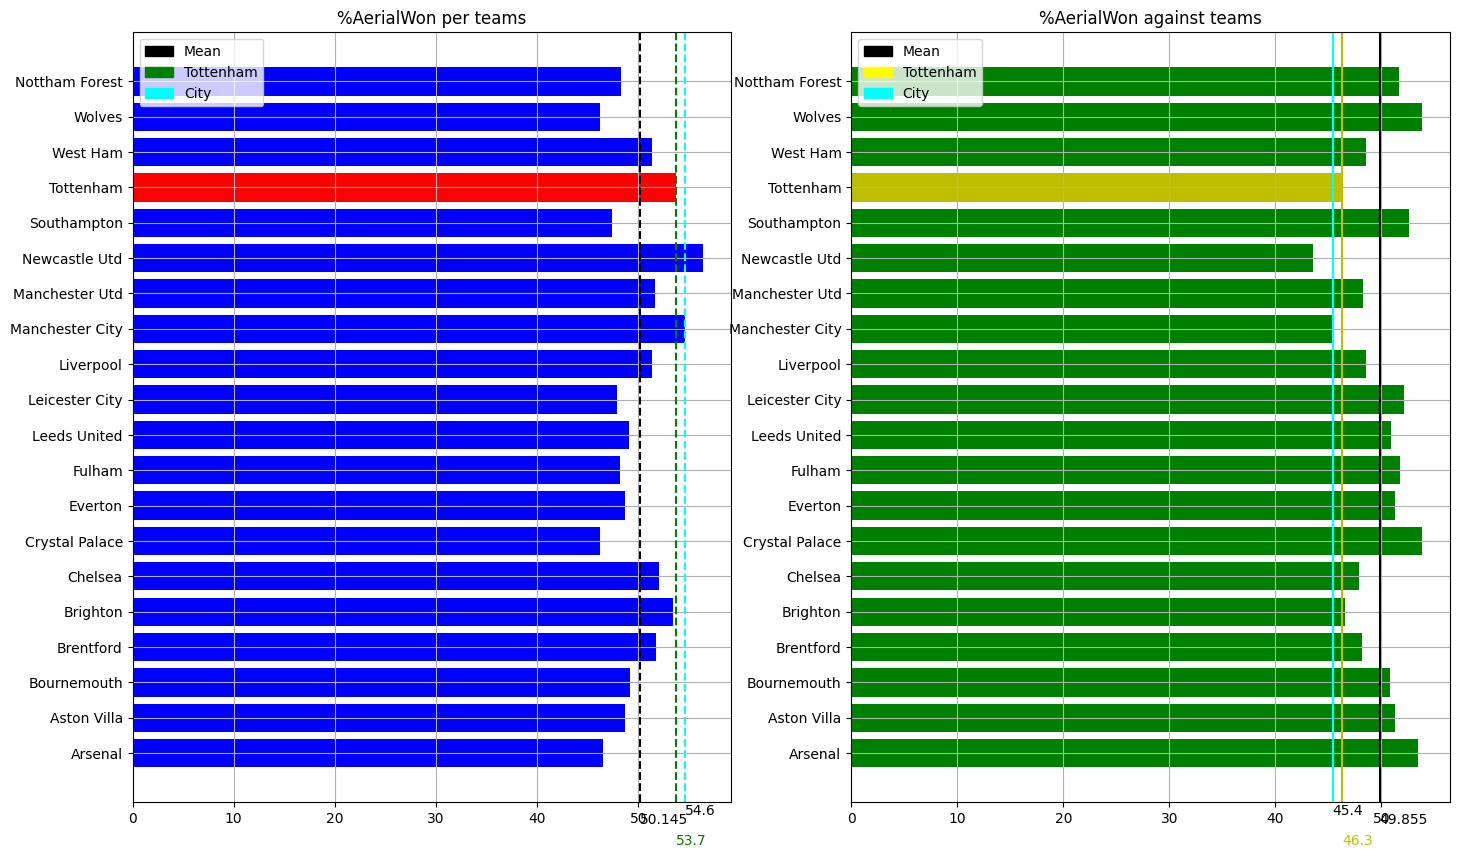

In [110]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico4.keys()),list(dico4.values()),color=colors)
ax[1].barh(list(dic4.keys()),list(dic4.values()),color=color)
ax[0].axvline(stat.mean(list(dico4.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico4.values())),-2, f'{stat.mean(list(dico4.values()))}',color='black')
ax[0].axvline(dico4["Tottenham"],color='green',linestyle='--')
ax[0].text(dico4["Tottenham"],-2.6, f'{dico4["Tottenham"]}',color='green')
ax[0].axvline(dico4["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico4["Manchester City"],-1.75, f'{dico4["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic4.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic4.values())),-2, f'{stat.mean(list(dic4.values()))}',color='black')
ax[1].axvline(dic4["Tottenham"],color='y',linestyle='-')
ax[1].text(dic4["Tottenham"],-2.6, f'{dic4["Tottenham"]}',color='y')
ax[1].axvline(dic4["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic4["Manchester City"],-1.75, f'{dic4["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('%AerialWon per teams')
ax[1].set_title('%AerialWon against teams')
ax[0].grid(True)
ax[1].grid(True)

In [111]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    dictionnaire_moyenne[clé] = moyenne_valeur
  return dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [d1,dd1,d3,dd3,d5,dd5,d7,dd7,d9,dd9]

dictionnaire_moyenne = calculer_moyenne(dictionnaires)

dictionnaire_moyenne = dict(sorted(dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(dictionnaire_moyenne)

Newcastle Utd: 15.6
Manchester City: 15.2
Brighton: 14.8
Arsenal: 13.4
Brentford: 12.8
Aston Villa: 12.6
Chelsea: 12.4
Liverpool: 11.6
West Ham: 11.4
Tottenham: 11.2
Everton: 9.8
Fulham: 9.8
Leeds United: 9.6
Crystal Palace: 9.4
Leicester City: 9.2
Southampton: 9.2
Bournemouth: 8.8
Manchester Utd: 8.4
Nottham Forest: 8.4
Wolves: 6.2


# ***2-Players rating and selection***

In [112]:
data = pd.read_excel('/content/all_players_miscellaneous_stats.xlsx')
dicttt = data.set_index('Player')['Squad'].to_dict()
games= data.set_index('Player')['90s'].to_dict()
p= data.set_index('Player')['Pos'].to_dict()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


***sub-axis4.1 : Yellow Card***

In [113]:
misc = data.set_index('Player')['CrdY'].to_dict()

In [114]:
def replace_nan_values_with_l_keys(l):
  """Returns a new dictionary containing the original list, with NaN values replaced by 0, and using the keys of l as the keys of the dictionary."""
  dictionary = {}
  for key, value in l.items():
    if math.isnan(value):
      dictionary[key] = 0
    else:
      dictionary[key] = value
  return dictionary

miscb = replace_nan_values_with_l_keys(misc)

In [115]:
d = miscb.copy()
di = {
        (np.percentile(list(d.values()),0),np.percentile(list(d.values()),5)): 20,
        (np.percentile(list(d.values()),5),np.percentile(list(d.values()),10)): 19,
        (np.percentile(list(d.values()),10),np.percentile(list(d.values()),15)): 18,
        (np.percentile(list(d.values()),15),np.percentile(list(d.values()),20)):17,
        (np.percentile(list(d.values()),20),np.percentile(list(d.values()),25)): 16,
        (np.percentile(list(d.values()),25),np.percentile(list(d.values()),30)): 15,
        (np.percentile(list(d.values()),30),np.percentile(list(d.values()),35)): 14,
        (np.percentile(list(d.values()),35),np.percentile(list(d.values()),40)):13,
        (np.percentile(list(d.values()),40),np.percentile(list(d.values()),45)): 12,
        (np.percentile(list(d.values()),45),np.percentile(list(d.values()),50)): 11,
        (np.percentile(list(d.values()),50),np.percentile(list(d.values()),55)): 10,
        (np.percentile(list(d.values()),55),np.percentile(list(d.values()),60)):9,
        (np.percentile(list(d.values()),60),np.percentile(list(d.values()),65)): 8,
        (np.percentile(list(d.values()),65),np.percentile(list(d.values()),75)): 7,
        (np.percentile(list(d.values()),75),np.percentile(list(d.values()),80)):6,
        (np.percentile(list(d.values()),80),np.percentile(list(d.values()),85)): 5,
        (np.percentile(list(d.values()),85),np.percentile(list(d.values()),90)): 4,
        (np.percentile(list(d.values()),90),np.percentile(list(d.values()),96)): 3,
        (np.percentile(list(d.values()),96),np.percentile(list(d.values()),98)):2,
        (np.percentile(list(d.values()),98),np.percentile(list(d.values()),100)):1,
    }

def aux(d,key1,value):
    d[key1] = next((score for age_range, score in di.copy().items() if age_range[0] <= value <= age_range[1]))

In [116]:
ll= miscb.copy()

for (key,value) in ll.copy().items():
  aux(ll,key,value)

pprint.pprint(ll)
print(f"Mean :{stat.mean(list(ll.values()))}\n")

{'Aaron Cresswell': 9,
 'Aaron Hickey': 4,
 'Aaron Ramsdale': 15,
 'Aaron Ramsey': 9,
 'Aaron Wan-Bissaka': 12,
 'Aaron Zehnter': 16,
 'Aarón Martín': 9,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 6,
 'Abdessamad Ezzalzouli': 7,
 'Abdou Diallo': 12,
 'Abdou Harroui': 12,
 'Abdoul Kader Bamba': 16,
 'Abdoulaye Bamba': 12,
 'Abdoulaye Doucouré': 5,
 'Abdu Conté': 16,
 'Abdul Mumin': 12,
 'Abdón Prats': 15,
 'Abner': 12,
 'Achraf Dari': 15,
 'Achraf Hakimi': 4,
 'Adam Armstrong': 12,
 'Adam Buksa': 16,
 'Adam Forshaw': 16,
 'Adam Hložek': 12,
 'Adam Lallana': 16,
 'Adam Marušić': 3,
 'Adam Masina': 12,
 'Adam Ounas': 12,
 'Adam Smith': 1,
 'Adam Webster': 12,
 'Adama Soumaoro': 6,
 'Adama Traoré': 12,
 'Ademola Lookman': 9,
 'Adil Aouchiche': 16,
 'Adil Rami': 12,
 'Adnan Januzaj': 16,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 12,
 'Adri Embarba': 16,
 'Adrian Grbić': 16,
 'Adrien Hunou': 12,
 'Adrien Rabiot': 3,
 'Adrien Tameze': 9,
 'Adrien Thomasson': 15,
 'Adrien Truffert': 15,
 'Adrià Ped

In [117]:
tt0 = ll.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt0.copy().items():
  if (value < np.percentile(list(tt0.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20):
    del tt0[key]
pprint.pprint(tt0)

{'Abdallah Sima': 16,
 'Aleksei Miranchuk': 16,
 'Alex Meret': 16,
 'Alphonso Davies': 16,
 'Andrea Consigli': 16,
 'Arnaud Kalimuendo': 16,
 'Danilho Doekhi': 16,
 'Danny Ward': 16,
 'Danny Welbeck': 16,
 'Darko Lazović': 16,
 'David de Gea': 16,
 'Emi Buendía': 16,
 'Ethan Pinnock': 16,
 'Fabián Ruiz Peña': 16,
 'Faitout Maouassa': 16,
 'Federico Dimarco': 16,
 'Gavin Bazunu': 16,
 'Gregor Kobel': 16,
 'Hugo Lloris': 16,
 'Jakub Kamiński': 16,
 'Janis Blaswich': 16,
 'Kaoru Mitoma': 16,
 'Kasper Schmeichel': 16,
 'Koen Casteels': 16,
 'Kurt Zouma': 16,
 'Lionel Messi': 16,
 'Lukáš Hrádecký': 16,
 'Marc-André ter Stegen': 16,
 'Marco Silvestri': 16,
 'Mark Flekken': 16,
 'Michele Di Gregorio': 16,
 'Mike Maignan': 16,
 'Montassar Talbi': 16,
 'Mory Diaw': 16,
 'Paul Bernardoni': 16,
 'Rayan Raveloson': 16,
 'Saïd Benrahma': 16,
 'Serge Gnabry': 16,
 'Thibaut Courtois': 16,
 'Thomas Foket': 16,
 'Tyronne Ebuehi': 16,
 'Wojciech Szczęsny': 16,
 'Yvon Mvogo': 16,
 'İlkay Gündoğan': 16}


***sub-axis4.2 : Red Card***

In [118]:
misc1 = data.set_index('Player')['CrdR'].to_dict()
misc1b = replace_nan_values_with_l_keys(misc1)
d1 = misc1b.copy()

In [119]:
di1 = {
        (np.percentile(list(d1.values()),0),np.percentile(list(d1.values()),5)): 20,
        (np.percentile(list(d1.values()),5),np.percentile(list(d1.values()),10)): 19,
        (np.percentile(list(d1.values()),10),np.percentile(list(d1.values()),15)): 18,
        (np.percentile(list(d1.values()),15),np.percentile(list(d1.values()),20)):17,
        (np.percentile(list(d1.values()),20),np.percentile(list(d1.values()),25)): 16,
        (np.percentile(list(d1.values()),25),np.percentile(list(d1.values()),30)): 15,
        (np.percentile(list(d1.values()),30),np.percentile(list(d1.values()),35)): 14,
        (np.percentile(list(d1.values()),35),np.percentile(list(d1.values()),40)):13,
        (np.percentile(list(d1.values()),40),np.percentile(list(d1.values()),45)): 12,
        (np.percentile(list(d1.values()),45),np.percentile(list(d1.values()),50)): 11,
        (np.percentile(list(d1.values()),50),np.percentile(list(d1.values()),55)): 10,
        (np.percentile(list(d1.values()),55),np.percentile(list(d1.values()),60)):9,
        (np.percentile(list(d1.values()),60),np.percentile(list(d1.values()),65)): 8,
        (np.percentile(list(d1.values()),65),np.percentile(list(d1.values()),75)): 7,
        (np.percentile(list(d1.values()),75),np.percentile(list(d1.values()),80)):6,
        (np.percentile(list(d1.values()),80),np.percentile(list(d1.values()),85)): 5,
        (np.percentile(list(d1.values()),85),np.percentile(list(d1.values()),90)): 4,
        (np.percentile(list(d1.values()),90),np.percentile(list(d1.values()),96)): 3,
        (np.percentile(list(d1.values()),96),np.percentile(list(d1.values()),98)):2,
        (np.percentile(list(d1.values()),98),np.percentile(list(d1.values()),100)):1,
    }

def aux1(d,key1,value):
    d[key1] = next((score for age_range, score in di1.copy().items() if age_range[0] <= value <= age_range[1]))

In [120]:
ll1= misc1b.copy()

for (key,value) in ll1.copy().items():
  aux1(ll1,key,value)

pprint.pprint(ll1)
print(f"Mean :{stat.mean(list(ll1.values()))}\n")

{'Aaron Cresswell': 5,
 'Aaron Hickey': 5,
 'Aaron Ramsdale': 5,
 'Aaron Ramsey': 5,
 'Aaron Wan-Bissaka': 5,
 'Aaron Zehnter': 5,
 'Aarón Martín': 5,
 'Abdallah Sima': 5,
 'Abdelhamid Sabiri': 5,
 'Abdessamad Ezzalzouli': 1,
 'Abdou Diallo': 5,
 'Abdou Harroui': 5,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 5,
 'Abdoulaye Doucouré': 4,
 'Abdu Conté': 5,
 'Abdul Mumin': 5,
 'Abdón Prats': 5,
 'Abner': 5,
 'Achraf Dari': 5,
 'Achraf Hakimi': 1,
 'Adam Armstrong': 5,
 'Adam Buksa': 5,
 'Adam Forshaw': 5,
 'Adam Hložek': 5,
 'Adam Lallana': 5,
 'Adam Marušić': 4,
 'Adam Masina': 5,
 'Adam Ounas': 5,
 'Adam Smith': 5,
 'Adam Webster': 5,
 'Adama Soumaoro': 4,
 'Adama Traoré': 5,
 'Ademola Lookman': 5,
 'Adil Aouchiche': 5,
 'Adil Rami': 5,
 'Adnan Januzaj': 5,
 'Ado Onaiwu': 5,
 'Adolfo Gaich': 5,
 'Adri Embarba': 5,
 'Adrian Grbić': 5,
 'Adrien Hunou': 5,
 'Adrien Rabiot': 5,
 'Adrien Tameze': 5,
 'Adrien Thomasson': 5,
 'Adrien Truffert': 5,
 'Adrià Pedrosa': 5,
 'Adu Ares': 5,
 'Agus

In [121]:
tt1 = ll1.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt1.copy().items():
  if value < np.percentile(list(tt1.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<30:
    del tt1[key]
pprint.pprint(tt1)

{'Adam Smith': 5,
 'Adrien Rabiot': 5,
 'Adrien Tameze': 5,
 'Alessandro Buongiorno': 5,
 'Alessio Romagnoli': 5,
 'Alex Iwobi': 5,
 'Alex Meret': 5,
 'Alexander Nübel': 5,
 'Alexandre Lacazette': 5,
 'Alexis Mac Allister': 5,
 'Alfonso Espino': 5,
 'Alisson': 5,
 'Andre-Frank Zambo Anguissa': 5,
 'Andrea Consigli': 5,
 'Andrei Girotto': 5,
 'Angel Gomes': 5,
 'Antoine Griezmann': 5,
 'Antonee Robinson': 5,
 'Arnau Martinez': 5,
 'Arthur Theate': 5,
 'Axel Disasi': 5,
 'Bartłomiej Dr? gowski': 5,
 'Ben Mee': 5,
 'Benjamin André': 5,
 'Benjamin Leroy': 5,
 'Bernd Leno': 5,
 'Birama Touré': 5,
 'Borja Mayoral': 5,
 'Branco van den Boomen': 5,
 'Brennan Johnson': 5,
 'Brice Samba': 5,
 'Bruno Fernandes': 5,
 'Bruno Guimarães': 5,
 'Bryan Mbeumo': 5,
 'Caio Henrique Oliveira Silva': 5,
 'Carlos': 5,
 'Chancel Mbemba': 5,
 'Chris Smalling': 5,
 'Christian Günter': 5,
 'Cédric Hountondji': 5,
 'Dan Burn': 5,
 'Daniel Parejo': 5,
 'Danilo': 5,
 'Dante': 5,
 'David Raya': 5,
 'David Soria': 5,

***sub-axis4.3 : Fouls***

In [122]:
misc2 = data.set_index('Player')['Fls'].to_dict()
misc2b = replace_nan_values_with_l_keys(misc2)
d2 = misc2b.copy()

In [123]:
di2 = {
        (np.percentile(list(d2.values()),0),np.percentile(list(d2.values()),5)): 20,
        (np.percentile(list(d2.values()),5),np.percentile(list(d2.values()),10)): 19,
        (np.percentile(list(d2.values()),10),np.percentile(list(d2.values()),15)): 18,
        (np.percentile(list(d2.values()),15),np.percentile(list(d2.values()),20)):17,
        (np.percentile(list(d2.values()),20),np.percentile(list(d2.values()),25)): 16,
        (np.percentile(list(d1.values()),25),np.percentile(list(d1.values()),30)): 15,
        (np.percentile(list(d2.values()),30),np.percentile(list(d2.values()),35)): 14,
        (np.percentile(list(d2.values()),35),np.percentile(list(d2.values()),40)):13,
        (np.percentile(list(d2.values()),40),np.percentile(list(d2.values()),45)): 12,
        (np.percentile(list(d2.values()),45),np.percentile(list(d2.values()),50)): 11,
        (np.percentile(list(d2.values()),50),np.percentile(list(d2.values()),55)): 10,
        (np.percentile(list(d2.values()),55),np.percentile(list(d2.values()),60)):9,
        (np.percentile(list(d2.values()),60),np.percentile(list(d2.values()),65)): 8,
        (np.percentile(list(d2.values()),65),np.percentile(list(d2.values()),75)): 7,
        (np.percentile(list(d2.values()),75),np.percentile(list(d2.values()),80)):6,
        (np.percentile(list(d2.values()),80),np.percentile(list(d2.values()),85)): 5,
        (np.percentile(list(d2.values()),85),np.percentile(list(d2.values()),90)): 4,
        (np.percentile(list(d2.values()),90),np.percentile(list(d2.values()),96)): 3,
        (np.percentile(list(d2.values()),96),np.percentile(list(d2.values()),98)):2,
        (np.percentile(list(d2.values()),98),np.percentile(list(d2.values()),100)):1,
    }

def aux2(d,key1,value):
    d[key1] = next((score for age_range, score in di2.copy().items() if age_range[0] <= value <= age_range[1]))

In [124]:
ll2= misc2b.copy()

for (key,value) in ll2.copy().items():
  aux2(ll2,key,value)

pprint.pprint(ll2)
print(f"Mean :{stat.mean(list(ll2.values()))}\n")

{'Aaron Cresswell': 12,
 'Aaron Hickey': 7,
 'Aaron Ramsdale': 15,
 'Aaron Ramsey': 7,
 'Aaron Wan-Bissaka': 11,
 'Aaron Zehnter': 15,
 'Aarón Martín': 6,
 'Abdallah Sima': 5,
 'Abdelhamid Sabiri': 6,
 'Abdessamad Ezzalzouli': 6,
 'Abdou Diallo': 16,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 16,
 'Abdoulaye Bamba': 12,
 'Abdoulaye Doucouré': 7,
 'Abdu Conté': 11,
 'Abdul Mumin': 13,
 'Abdón Prats': 14,
 'Abner': 13,
 'Achraf Dari': 11,
 'Achraf Hakimi': 5,
 'Adam Armstrong': 9,
 'Adam Buksa': 14,
 'Adam Forshaw': 14,
 'Adam Hložek': 8,
 'Adam Lallana': 16,
 'Adam Marušić': 7,
 'Adam Masina': 11,
 'Adam Ounas': 10,
 'Adam Smith': 5,
 'Adam Webster': 12,
 'Adama Soumaoro': 7,
 'Adama Traoré': 7,
 'Ademola Lookman': 7,
 'Adil Aouchiche': 14,
 'Adil Rami': 12,
 'Adnan Januzaj': 18,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 9,
 'Adri Embarba': 18,
 'Adrian Grbić': 16,
 'Adrien Hunou': 10,
 'Adrien Rabiot': 3,
 'Adrien Tameze': 5,
 'Adrien Thomasson': 7,
 'Adrien Truffert': 7,
 'Adrià Pedrosa':

In [125]:
tt2 = ll2.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt2.copy().items():
  if value < np.percentile(list(tt2.values()),55) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20 or p[key] == "GK":
    del tt2[key]
pprint.pprint(tt2)

{'Aaron Cresswell': 12,
 'Adam Webster': 12,
 'Aleksei Miranchuk': 12,
 'Alphonso Davies': 12,
 'Andrej Kramarić': 12,
 'Antonio Candreva': 13,
 'Armel Bella Kotchap': 12,
 'Chris Führich': 14,
 'Christian Eriksen': 11,
 'Darko Lazović': 13,
 'David Alaba': 12,
 'Ethan Pinnock': 14,
 'Jakub Kamiński': 12,
 'Jeremy Toljan': 12,
 'Jesús Navas': 13,
 'John Stones': 12,
 'Julian Brandt': 12,
 'Karim Benzema': 12,
 'Lionel Messi': 13,
 'Marvin Ducksch': 16,
 'Mathieu Coutadeur': 14,
 'Niklas Süle': 13,
 'Pedri': 13,
 'Phil Foden': 12,
 'Raphaël Guerreiro': 13,
 'Sergi Gómez': 12,
 'Sergio Canales': 12,
 'Thierno Balde': 13,
 'Timo Werner': 14,
 'Vincenzo Grifo': 13}


***sub-axis4.4 : Balls Recovered***

In [126]:
misc3 = data.set_index('Player')['Recov'].to_dict()
misc3b = replace_nan_values_with_l_keys(misc3)
d3 = misc3b.copy()

In [127]:
di3 = {
        (np.percentile(list(d3.values()),0),np.percentile(list(d3.values()),5)): 1,
        (np.percentile(list(d3.values()),5),np.percentile(list(d3.values()),10)): 2,
        (np.percentile(list(d3.values()),10),np.percentile(list(d3.values()),15)): 3,
        (np.percentile(list(d3.values()),15),np.percentile(list(d3.values()),20)):4,
        (np.percentile(list(d3.values()),20),np.percentile(list(d3.values()),25)): 5,
        (np.percentile(list(d3.values()),25),np.percentile(list(d3.values()),30)): 6,
        (np.percentile(list(d3.values()),30),np.percentile(list(d3.values()),35)): 7,
        (np.percentile(list(d3.values()),35),np.percentile(list(d3.values()),40)):8,
        (np.percentile(list(d3.values()),40),np.percentile(list(d3.values()),45)): 9,
        (np.percentile(list(d3.values()),45),np.percentile(list(d3.values()),50)): 10,
        (np.percentile(list(d3.values()),50),np.percentile(list(d3.values()),55)): 11,
        (np.percentile(list(d3.values()),55),np.percentile(list(d3.values()),60)):12,
        (np.percentile(list(d3.values()),60),np.percentile(list(d3.values()),65)): 13,
        (np.percentile(list(d3.values()),65),np.percentile(list(d3.values()),75)): 14,
        (np.percentile(list(d3.values()),75),np.percentile(list(d3.values()),80)):15,
        (np.percentile(list(d3.values()),80),np.percentile(list(d3.values()),85)): 16,
        (np.percentile(list(d3.values()),85),np.percentile(list(d3.values()),90)): 17,
        (np.percentile(list(d3.values()),90),np.percentile(list(d3.values()),96)): 18,
        (np.percentile(list(d3.values()),96),np.percentile(list(d3.values()),98)):19,
        (np.percentile(list(d3.values()),98),np.percentile(list(d3.values()),100)):20,
    }

def aux3(d,key1,value):
    d[key1] = next((score for age_range, score in di3.copy().items() if age_range[0] <= value <= age_range[1]))

In [128]:
ll3= misc3b.copy()

for (key,value) in ll3.copy().items():
  aux3(ll3,key,value)

pprint.pprint(ll3)
print(f"Mean :{stat.mean(list(ll3.values()))}\n")

{'Aaron Cresswell': 15,
 'Aaron Hickey': 15,
 'Aaron Ramsdale': 8,
 'Aaron Ramsey': 15,
 'Aaron Wan-Bissaka': 13,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 10,
 'Abdelhamid Sabiri': 10,
 'Abdessamad Ezzalzouli': 12,
 'Abdou Diallo': 9,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 3,
 'Abdoulaye Bamba': 12,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 12,
 'Abdul Mumin': 11,
 'Abdón Prats': 5,
 'Abner': 9,
 'Achraf Dari': 13,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 11,
 'Adam Buksa': 2,
 'Adam Forshaw': 9,
 'Adam Hložek': 9,
 'Adam Lallana': 7,
 'Adam Marušić': 18,
 'Adam Masina': 9,
 'Adam Ounas': 11,
 'Adam Smith': 16,
 'Adam Webster': 16,
 'Adama Soumaoro': 14,
 'Adama Traoré': 12,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 5,
 'Adil Rami': 14,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 8,
 'Adolfo Gaich': 5,
 'Adri Embarba': 2,
 'Adrian Grbić': 1,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 19,
 'Adrien Thomasson': 13,
 'Adrien Truffert': 15,
 'Adrià Pedrosa

In [129]:
tt3 = ll3.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt3.copy().items():
  if value < np.percentile(list(tt3.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt3[key]
pprint.pprint(tt3)

{'Alex Iwobi': 20,
 'Alfonso Espino': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Antonee Robinson': 20,
 'Axel Disasi': 20,
 'Azor Matusiwa': 20,
 'Benjamin André': 20,
 'Birama Touré': 20,
 'Bruno Guimarães': 20,
 'Daniel Parejo': 20,
 'Dante': 20,
 'Declan Rice': 20,
 'Edimilson Fernandes': 20,
 'Edmond Tapsoba': 20,
 'Ellyes Skhiri': 20,
 'Emmanuel Agbadou': 20,
 'Enzo Le Fée': 20,
 'Fabiano Parisi': 20,
 'Fran Garcia': 20,
 'Gideon Mensah': 20,
 'Idrissa Gana Gueye': 20,
 'Isak Hien': 20,
 'Jean-Clair Todibo': 20,
 'Jefferson Lerma': 20,
 'Jordan Ferri': 20,
 'Jordan Veretout': 20,
 'Joshua Kimmich': 20,
 'Kieran Trippier': 20,
 'Lewis Dunk': 20,
 'Marc Guéhi': 20,
 'Marco Friedl': 20,
 'Matteo Pessina': 20,
 'Maximilian Arnold': 20,
 'Moisés Caicedo': 20,
 'Morten Hjulmand': 20,
 'Nabil Bentaleb': 20,
 'Pierre Højbjerg': 20,
 'Pierre Lees-Melou': 20,
 'Rafael Tolói': 20,
 'Robin Knoche': 20,
 'Rominigue Kouamé': 20,
 'Rúben Neves': 20,
 'Stanislav Lobotka': 20,
 'Stijn Spierings': 2

***sub-axis4.5 : %Aerial Duel Won**

In [130]:
misc4 = data.set_index('Player')['Won%'].to_dict()
misc4b = replace_nan_values_with_l_keys(misc4)
d4 = misc4b.copy()

In [131]:
di4 = {
        (np.percentile(list(d4.values()),0),np.percentile(list(d4.values()),5)): 1,
        (np.percentile(list(d4.values()),5),np.percentile(list(d4.values()),10)): 2,
        (np.percentile(list(d4.values()),10),np.percentile(list(d4.values()),15)): 3,
        (np.percentile(list(d4.values()),15),np.percentile(list(d4.values()),20)):4,
        (np.percentile(list(d4.values()),20),np.percentile(list(d4.values()),25)): 5,
        (np.percentile(list(d4.values()),25),np.percentile(list(d4.values()),30)): 6,
        (np.percentile(list(d4.values()),30),np.percentile(list(d4.values()),35)): 7,
        (np.percentile(list(d4.values()),35),np.percentile(list(d4.values()),40)):8,
        (np.percentile(list(d4.values()),40),np.percentile(list(d4.values()),45)): 9,
        (np.percentile(list(d4.values()),45),np.percentile(list(d4.values()),50)): 10,
        (np.percentile(list(d4.values()),50),np.percentile(list(d4.values()),55)): 11,
        (np.percentile(list(d4.values()),55),np.percentile(list(d4.values()),60)):12,
        (np.percentile(list(d4.values()),60),np.percentile(list(d4.values()),65)): 13,
        (np.percentile(list(d4.values()),65),np.percentile(list(d4.values()),75)): 14,
        (np.percentile(list(d4.values()),75),np.percentile(list(d4.values()),80)):15,
        (np.percentile(list(d4.values()),80),np.percentile(list(d4.values()),85)): 16,
        (np.percentile(list(d4.values()),85),np.percentile(list(d4.values()),90)): 17,
        (np.percentile(list(d4.values()),90),np.percentile(list(d4.values()),96)): 18,
        (np.percentile(list(d4.values()),96),np.percentile(list(d4.values()),98)):19,
        (np.percentile(list(d4.values()),98),np.percentile(list(d4.values()),100)):20,
    }

def aux4(d,key1,value):
    d[key1] = next((score for age_range, score in di4.copy().items() if age_range[0] <= value <= age_range[1]))

In [132]:
ll4= misc4b.copy()

for (key,value) in ll4.copy().items():
  aux4(ll4,key,value)

pprint.pprint(ll4)
print(f"Mean :{stat.mean(list(ll4.values()))}\n")

{'Aaron Cresswell': 13,
 'Aaron Hickey': 8,
 'Aaron Ramsdale': 18,
 'Aaron Ramsey': 6,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 2,
 'Aarón Martín': 3,
 'Abdallah Sima': 9,
 'Abdelhamid Sabiri': 13,
 'Abdessamad Ezzalzouli': 3,
 'Abdou Diallo': 13,
 'Abdou Harroui': 16,
 'Abdoul Kader Bamba': 18,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 6,
 'Abdu Conté': 17,
 'Abdul Mumin': 9,
 'Abdón Prats': 5,
 'Abner': 7,
 'Achraf Dari': 15,
 'Achraf Hakimi': 12,
 'Adam Armstrong': 4,
 'Adam Buksa': 3,
 'Adam Forshaw': 4,
 'Adam Hložek': 7,
 'Adam Lallana': 11,
 'Adam Marušić': 14,
 'Adam Masina': 17,
 'Adam Ounas': 6,
 'Adam Smith': 10,
 'Adam Webster': 17,
 'Adama Soumaoro': 17,
 'Adama Traoré': 15,
 'Ademola Lookman': 4,
 'Adil Aouchiche': 2,
 'Adil Rami': 16,
 'Adnan Januzaj': 2,
 'Ado Onaiwu': 12,
 'Adolfo Gaich': 6,
 'Adri Embarba': 2,
 'Adrian Grbić': 2,
 'Adrien Hunou': 9,
 'Adrien Rabiot': 14,
 'Adrien Tameze': 11,
 'Adrien Thomasson': 8,
 'Adrien Truffert': 14,
 'Adrià Pedrosa': 12

In [133]:
tt4 = ll4.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt4.copy().items():
  if value < np.percentile(list(tt4.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt4[key]
pprint.pprint(tt4)

{'Aitor Fernández': 18,
 'Alban Lafont': 18,
 'Alex Meret': 18,
 'Alexander Djiku': 18,
 'Alexander Nübel': 18,
 'Alexander Schwolow': 18,
 'Alidu Seidu': 18,
 'Alisson': 18,
 'Andrea Consigli': 18,
 'André Onana': 18,
 'Anthony Lopes': 18,
 'Bartłomiej Dr? gowski': 18,
 'Benjamin Leroy': 18,
 'Bernd Leno': 18,
 'Brice Samba': 18,
 'Chris Smalling': 18,
 'Danny Ward': 18,
 'Dante': 18,
 'David Raya': 18,
 'David Soria': 18,
 'David de Gea': 18,
 'Ederson': 18,
 'Emil Audero': 18,
 'Emiliano Martínez': 18,
 'Federico Valverde': 18,
 'Frederik Rønnow': 18,
 'Gauthier Gallon': 18,
 'Gavin Bazunu': 18,
 'Gianluigi Donnarumma': 18,
 'Giorgi Mamardashvili': 18,
 'Gregor Kobel': 18,
 'Guglielmo Vicario': 18,
 'Guillermo Ochoa': 18,
 'Hugo Lloris': 18,
 'Illan Meslier': 18,
 'Ivan Provedel': 18,
 'Jan Oblak': 18,
 'Janis Blaswich': 18,
 'Jeremías Ledesma': 18,
 'Jiří Pavlenka': 18,
 'Joachim Andersen': 18,
 'Jordan Pickford': 18,
 'Jordi Masip': 18,
 'José Sá': 18,
 'Juan Musso': 18,
 'Kasper 

In [134]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  misc_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    misc_dictionnaire_moyenne[clé] = moyenne_valeur
  return misc_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [ll,ll1,ll2,ll3,ll4]

misc_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

misc_dictionnaire_moyenne = dict(sorted(misc_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(misc_dictionnaire_moyenne)

Alisson: 13.6
Janis Blaswich: 13.4
Ethan Pinnock: 13.4
Gavin Bazunu: 13.2
Koen Casteels: 13.2
Mark Flekken: 13.2
Alex Meret: 13.2
Ivan Provedel: 13.2
Marc-André ter Stegen: 13.2
Thibaut Courtois: 13.0
Lukáš Hrádecký: 13.0
Ben Johnson: 13.0
Steve Mandanda: 13.0
Rui Patrício: 13.0
Yann Sommer: 13.0
Lucas Chevalier: 12.8
Chidera Ejuke: 12.8
Marcin Kamiński: 12.8
Angelo Ogbonna: 12.8
Álex Remiro: 12.8
Manuel Riemann: 12.8
Antonio Rüdiger: 12.8
Thiago Silva: 12.8
Pietro Terracciano: 12.8
Paul Bernardoni: 12.6
Jérôme Boateng: 12.6
Levi Colwill: 12.6
Alphonso Davies: 12.6
Wladimiro Falcone: 12.6
Aleix García: 12.6
Vicente Guaita: 12.6
Michael Keane: 12.6
Gregor Kobel: 12.6
Benjamin Leroy: 12.6
Florian Müller: 12.6
Jiří Pavlenka: 12.6
Ionuț Radu: 12.6
Lilian Raolisoa: 12.6
David Raya: 12.6
José Sá: 12.6
Marco Silvestri: 12.6
Niklas Süle: 12.6
Montassar Talbi: 12.6
Raphaël Varane: 12.6
Georginio Wijnaldum: 12.6
Oleksandr Zinchenko: 12.6
Kepa Arrizabalaga: 12.4
Emil Audero: 12.4
Ludwig Augustins

In [135]:
di5 = {
        (np.percentile(list(d5.values()),0),np.percentile(list(d5.values()),5)): 1,
        (np.percentile(list(d5.values()),5),np.percentile(list(d5.values()),10)): 2,
        (np.percentile(list(d5.values()),10),np.percentile(list(d5.values()),15)): 3,
        (np.percentile(list(d5.values()),15),np.percentile(list(d5.values()),20)):4,
        (np.percentile(list(d5.values()),20),np.percentile(list(d5.values()),25)): 5,
        (np.percentile(list(d5.values()),25),np.percentile(list(d5.values()),30)): 6,
        (np.percentile(list(d5.values()),30),np.percentile(list(d5.values()),35)): 7,
        (np.percentile(list(d5.values()),35),np.percentile(list(d5.values()),40)):8,
        (np.percentile(list(d5.values()),40),np.percentile(list(d5.values()),45)): 9,
        (np.percentile(list(d5.values()),45),np.percentile(list(d5.values()),50)): 10,
        (np.percentile(list(d5.values()),50),np.percentile(list(d5.values()),55)): 11,
        (np.percentile(list(d5.values()),55),np.percentile(list(d5.values()),60)):12,
        (np.percentile(list(d5.values()),60),np.percentile(list(d5.values()),65)): 13,
        (np.percentile(list(d5.values()),65),np.percentile(list(d5.values()),75)): 14,
        (np.percentile(list(d5.values()),75),np.percentile(list(d5.values()),80)):15,
        (np.percentile(list(d5.values()),80),np.percentile(list(d5.values()),85)): 16,
        (np.percentile(list(d5.values()),85),np.percentile(list(d5.values()),90)): 17,
        (np.percentile(list(d5.values()),90),np.percentile(list(d5.values()),96)): 18,
        (np.percentile(list(d5.values()),96),np.percentile(list(d5.values()),98)):19,
        (np.percentile(list(d5.values()),98),np.percentile(list(d5.values()),100)):20,
    }

def aux5(d,key1,value):
    d[key1] = next((score for age_range, score in di5.copy().items() if age_range[0] <= value <= age_range[1]))

In [136]:
ll5= misc_dictionnaire_moyenne.copy()

for (key,value) in ll5.copy().items():
  aux5(ll5,key,value)

pprint.pprint(ll5)
print(f"Mean :{stat.mean(list(ll5.values()))}\n")

{'Aaron Cresswell': 10,
 'Aaron Hickey': 7,
 'Aaron Ramsdale': 12,
 'Aaron Ramsey': 8,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 7,
 'Aarón Martín': 6,
 'Abdallah Sima': 8,
 'Abdelhamid Sabiri': 7,
 'Abdessamad Ezzalzouli': 5,
 'Abdou Diallo': 10,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 11,
 'Abdoulaye Bamba': 10,
 'Abdoulaye Doucouré': 6,
 'Abdu Conté': 12,
 'Abdul Mumin': 9,
 'Abdón Prats': 8,
 'Abner': 8,
 'Achraf Dari': 11,
 'Achraf Hakimi': 7,
 'Adam Armstrong': 8,
 'Adam Buksa': 7,
 'Adam Forshaw': 9,
 'Adam Hložek': 8,
 'Adam Lallana': 10,
 'Adam Marušić': 8,
 'Adam Masina': 10,
 'Adam Ounas': 8,
 'Adam Smith': 6,
 'Adam Webster': 12,
 'Adama Soumaoro': 9,
 'Adama Traoré': 10,
 'Ademola Lookman': 7,
 'Adil Aouchiche': 8,
 'Adil Rami': 11,
 'Adnan Januzaj': 8,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 6,
 'Adri Embarba': 8,
 'Adrian Grbić': 7,
 'Adrien Hunou': 9,
 'Adrien Rabiot': 8,
 'Adrien Tameze': 9,
 'Adrien Thomasson': 9,
 'Adrien Truffert': 11,
 'Adrià Pedrosa': 10,
 'Adu

In [150]:
tt5 = ll5.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt5.copy().items():
  if value < np.percentile(list(tt5.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20 or p[key] == "GK":
    del tt5[key]
pprint.pprint(tt5)

{'Adam Webster': 12,
 'Adrien Truffert': 11,
 'Aleix García': 12,
 'Alphonso Davies': 12,
 'Amir Rrahmani': 11,
 'Anthony Jung': 11,
 'Antonio Rüdiger': 12,
 'Axel Disasi': 11,
 'Baptiste Santamaria': 11,
 'Ben Mee': 11,
 'Chancel Mbemba': 11,
 'Christopher Trimmel': 11,
 'Danilho Doekhi': 11,
 'Danilo Pereira': 11,
 'Ethan Pinnock': 13,
 'Federico Valverde': 12,
 'Henning Matriciani': 11,
 'Jamal Musiala': 11,
 'Joe Scally': 11,
 'John Stones': 11,
 'Jonas Hector': 11,
 'Joško Gvardiol': 11,
 'Jules Koundé': 11,
 'Ko Itakura': 11,
 'Kurt Zouma': 12,
 'Kyle Walker': 11,
 'Mathieu Coutadeur': 11,
 'Max Kilman': 11,
 'Montassar Talbi': 12,
 'Nathan Aké': 11,
 'Nico Elvedi': 11,
 'Nico Schlotterbeck': 11,
 'Niklas Süle': 12,
 'Raphaël Varane': 12,
 'Rayan Raveloson': 11,
 'Seko Fofana': 11,
 'Sergi Gómez': 11,
 'Sven Botman': 12,
 'Tim Ream': 11,
 'Tommaso Augello': 11,
 'Vincent Le Goff': 11,
 'Vincenzo Grifo': 11,
 'Virgil van Dijk': 12,
 'Willi Orban': 11,
 'Yasser Larouci': 11,
 'İlka

In [138]:
def multiplier_valeurs(dictionnaire, n):
  return {clé: valeur * n for clé, valeur in dictionnaire.items()}

In [139]:
def somme_dictionnaires(dictionnaires):
  dictionnaire_somme = {}
  for clé, valeur in dictionnaires[0].items():
    dictionnaire_somme[clé] = sum([dictionnaire[clé] for dictionnaire in dictionnaires])
  return dictionnaire_somme

In [140]:
dictionnaires = [ multiplier_valeurs(ll, 0.05) ,
                 multiplier_valeurs(ll1, 0.05) ,
                  multiplier_valeurs(ll2, 0.05) ,
                  multiplier_valeurs(ll3, 0.55),
                  multiplier_valeurs(ll4, 0.3),
                  ]
ee = somme_dictionnaires(dictionnaires)

In [141]:
tt6 = ee.copy()
ttt = dicttt.copy()
g = games.copy()
for (key,value) in tt6.copy().items():
  if value < np.percentile(list(tt6.values()),98) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt6[key]
pprint.pprint(tt6)

{'Axel Disasi': 17.049999999999997,
 'Benjamin André': 15.85,
 'Bruno Guimarães': 16.1,
 'Chancel Mbemba': 16.25,
 'Dante': 17.05,
 'Ellyes Skhiri': 16.55,
 'Emmanuel Agbadou': 16.1,
 'Fabiano Parisi': 16.6,
 'Isak Hien': 16.0,
 'Jefferson Lerma': 16.1,
 'Joachim Andersen': 16.0,
 'Jonas Hector': 16.3,
 'Kevin Danso': 16.400000000000002,
 'Lewis Dunk': 16.2,
 'Max Kilman': 16.65,
 'Mikkel Desler': 16.1,
 'Moisés Caicedo': 16.2,
 'Nabil Bentaleb': 16.05,
 'Pierre Højbjerg': 17.099999999999998,
 'Pierre Lees-Melou': 16.25,
 'Sven Botman': 16.05,
 'Trent Alexander-Arnold': 16.4,
 'Tyrone Mings': 16.15,
 'Waldemar Anton': 15.75,
 'Wataru Endo': 16.05,
 'Yunis Abdelhamid': 16.4}


In [142]:
dff  = pd.read_excel('/content/all_players_wages.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [143]:
w = dff.set_index('Player')['Annual Wages'].to_dict()

In [144]:
import re

In [145]:
ww = w.copy()
for key, value in ww.items():
    value = re.sub(r"\(.*\)", "", value)
    value = re.sub(r"\s+", "", value)
    ww[key] = value
pprint.pprint(ww)

{'Aaron Cresswell': '£2,600,000',
 'Aaron Hickey': '£1,560,000',
 'Aaron Ramsdale': '£3,120,000',
 'Aaron Ramsey': '€5,450,000',
 'Aaron Wan-Bissaka': '£4,680,000',
 'Aaron Zehnter': '€50,000',
 'Aarón Martín': '€2,000,000',
 'Abdallah Sima': '€1,240,000',
 'Abde Ezzalzouli': '€180,000',
 'Abdelhamid Sabiri': '€110,000',
 'Abdou Diallo': '€5,400,000',
 'Abdou Harroui': '€120,000',
 'Abdoul Kader Bamba': '€320,000',
 'Abdoulaye Bamba': '€330,000',
 'Abdoulaye Doucouré': '£6,240,000',
 'Abdoulaye Kamara': '€150,000',
 'Abdu Conté': '€700,000',
 'Abdul Mumin': '€350,000',
 'Abdón Prats': '€230,000',
 'Abner': '€1,000,000',
 'Achraf Dari': '€480,000',
 'Achraf Hakimi': '€14,550,000',
 'Adam Armstrong': '£2,860,000',
 'Adam Buksa': '€1,020,000',
 'Adam Forshaw': '£1,040,000',
 'Adam Hložek': '€1,880,000',
 'Adam Jakubech': '€250,000',
 'Adam Lallana': '£4,680,000',
 'Adam Marušić': '€1,670,000',
 'Adam Masina': '€1,150,000',
 'Adam Oudjani': '€50,000',
 'Adam Ounas': '€2,730,000',
 'Adam Sm

In [146]:
www = ww.copy()
for key, value in www.items():
  if www[key][0] == '€':
    www[key] = int(www[key].split('€')[1].replace(',',''))
  elif www[key][0] == '£':
    www[key] = int(www[key].split('£')[1].replace(',',''))
pprint.pprint(www)

{'Aaron Cresswell': 2600000,
 'Aaron Hickey': 1560000,
 'Aaron Ramsdale': 3120000,
 'Aaron Ramsey': 5450000,
 'Aaron Wan-Bissaka': 4680000,
 'Aaron Zehnter': 50000,
 'Aarón Martín': 2000000,
 'Abdallah Sima': 1240000,
 'Abde Ezzalzouli': 180000,
 'Abdelhamid Sabiri': 110000,
 'Abdou Diallo': 5400000,
 'Abdou Harroui': 120000,
 'Abdoul Kader Bamba': 320000,
 'Abdoulaye Bamba': 330000,
 'Abdoulaye Doucouré': 6240000,
 'Abdoulaye Kamara': 150000,
 'Abdu Conté': 700000,
 'Abdul Mumin': 350000,
 'Abdón Prats': 230000,
 'Abner': 1000000,
 'Achraf Dari': 480000,
 'Achraf Hakimi': 14550000,
 'Adam Armstrong': 2860000,
 'Adam Buksa': 1020000,
 'Adam Forshaw': 1040000,
 'Adam Hložek': 1880000,
 'Adam Jakubech': 250000,
 'Adam Lallana': 4680000,
 'Adam Marušić': 1670000,
 'Adam Masina': 1150000,
 'Adam Oudjani': 50000,
 'Adam Ounas': 2730000,
 'Adam Smith': 1820000,
 'Adam Webster': 2860000,
 'Adama Soumaoro': 1390000,
 'Adama Traoré': 2860000,
 'Ademola Lookman': 2310000,
 'Adil Aouchiche': 3600

In [147]:
u = dff.set_index('Player')['Pos'].to_dict()
h = dff.set_index('Player')['Squad'].to_dict()

In [148]:
wage_basic = tt6.copy()
ttt = dicttt.copy()
y = www.copy()
for (key,value) in wage_basic.copy().items():
  if y[key] > 4632716 and h[key]!="Tottenham" :
    del wage_basic[key]
pprint.pprint(wage_basic)

{'Axel Disasi': 17.049999999999997,
 'Benjamin André': 15.85,
 'Chancel Mbemba': 16.25,
 'Dante': 17.05,
 'Ellyes Skhiri': 16.55,
 'Emmanuel Agbadou': 16.1,
 'Fabiano Parisi': 16.6,
 'Isak Hien': 16.0,
 'Jefferson Lerma': 16.1,
 'Joachim Andersen': 16.0,
 'Jonas Hector': 16.3,
 'Kevin Danso': 16.400000000000002,
 'Lewis Dunk': 16.2,
 'Max Kilman': 16.65,
 'Mikkel Desler': 16.1,
 'Moisés Caicedo': 16.2,
 'Nabil Bentaleb': 16.05,
 'Pierre Højbjerg': 17.099999999999998,
 'Pierre Lees-Melou': 16.25,
 'Tyrone Mings': 16.15,
 'Waldemar Anton': 15.75,
 'Wataru Endo': 16.05,
 'Yunis Abdelhamid': 16.4}


In [149]:
for (key,value) in wage_basic.copy().items():
  wage_basic[key]=u[key]
pprint.pprint(wage_basic)

{'Axel Disasi': 'DF',
 'Benjamin André': 'MF',
 'Chancel Mbemba': 'DF',
 'Dante': 'DF',
 'Ellyes Skhiri': 'MF',
 'Emmanuel Agbadou': 'DF',
 'Fabiano Parisi': 'DF',
 'Isak Hien': 'CB',
 'Jefferson Lerma': 'MF',
 'Joachim Andersen': 'DF',
 'Jonas Hector': 'DF',
 'Kevin Danso': 'DF',
 'Lewis Dunk': 'DF',
 'Max Kilman': 'DF',
 'Mikkel Desler': 'DF',
 'Moisés Caicedo': 'MF',
 'Nabil Bentaleb': 'MF',
 'Pierre Højbjerg': 'MF',
 'Pierre Lees-Melou': 'MF',
 'Tyrone Mings': 'DF',
 'Waldemar Anton': 'DF',
 'Wataru Endo': 'MF',
 'Yunis Abdelhamid': 'DF'}
